<a href="https://colab.research.google.com/github/Sawaiz8/Animal-Classification/blob/main/Animal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle

In [2]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d utkarshsaxenadn/animal-image-classification-dataset

100% 1.61G/1.61G [01:19<00:00, 23.8MB/s]
100% 1.61G/1.61G [01:19<00:00, 21.8MB/s]


In [22]:
import zipfile
zip_ref = zipfile.ZipFile('/content/animal-image-classification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten, BatchNormalization,Dropout

In [24]:
#Keras uses generators --> it divides the images into batches and loads only a batch in the RAM
from keras import utils
#it stores the training data in a numpy array

In [25]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Animal Classification/Animal Classification/Training Data',
    labels = 'inferred', #
    label_mode = 'int',
    batch_size = 32, 
    image_size = (256,256) #keeps image size same to 256 *256 * 3
) 

Found 7500 files belonging to 5 classes.


In [26]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Animal Classification/Animal Classification/Validation Data',
    labels = 'inferred', #
    label_mode = 'int',
    batch_size = 32, 
    image_size = (256,256) #keeps image size same to 256 *256 * 3
) 

Found 2500 files belonging to 5 classes.


In [27]:
#Normalize b/w 0 and 1
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [28]:
model = Sequential()
model.add(Conv2D(32,
                 kernel_size = (3,3),
                 padding = 'valid',
                 activation = 'relu',
                 input_shape = (256,256, 3)
  )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 padding = 'valid',
                 activation = 'relu'
  )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 padding = 'valid',
                 activation = 'relu'
  )
)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu', kernel_regularizer= keras.regularizers.L2(l2=0.05)))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu', kernel_regularizer= keras.regularizers.L2(l2=0.05)))
model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [30]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [31]:
history =model.fit(train_ds, epochs = 10, validation_data = validation_ds)


Epoch 1/10
234/235 [============================>.] - ETA: 0s - loss: 18.7368 - accuracy: 0.3502

InvalidArgumentError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history.history['accuracy'], color = 'red', label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='validation')
plt.legend()
plt.show()

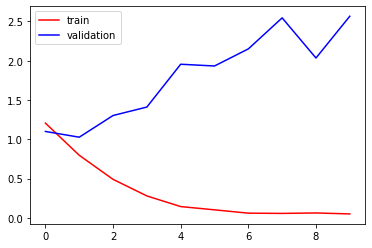

In [ ]:
plt.plot(history.history['loss'], color = 'red', label ='train')
plt.plot(history.history['val_loss'], color = 'blue', label ='validation')
plt.legend()
plt.show()

In [ ]:
#Overfitting 
#How to reduce
#L1 and L2 norm
#DAta augementation
#Dropout
#Batch Norm
#Reduce complexity

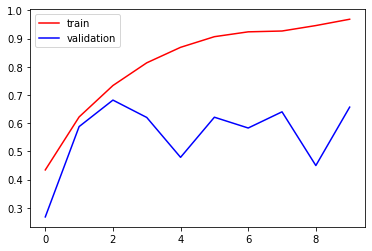

In [ ]:
#After adding batch normalization
plt.plot(history.history['accuracy'], color = 'red', label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='validation')
plt.legend()
plt.show()


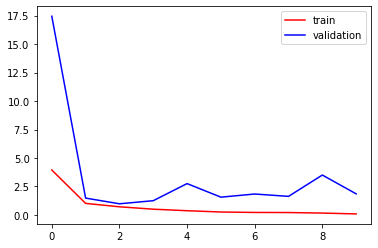

In [ ]:
#After adding batch normalization
plt.plot(history.history['loss'], color = 'red', label ='train')
plt.plot(history.history['val_loss'], color = 'blue', label ='validation')
plt.legend()
plt.show()

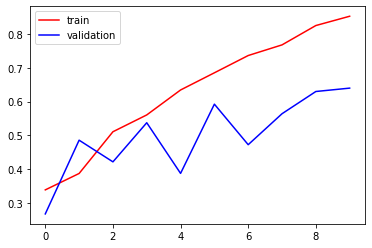

In [ ]:
#Batch norm + dropout
plt.plot(history.history['accuracy'], color = 'red', label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='validation')
plt.legend()
plt.show()

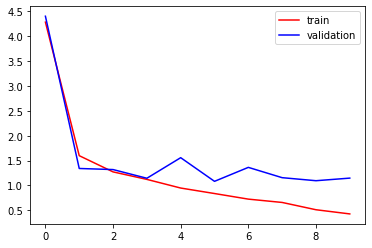

In [ ]:
#After adding batch normalization +Dropout
plt.plot(history.history['loss'], color = 'red', label ='train')
plt.plot(history.history['val_loss'], color = 'blue', label ='validation')
plt.legend()
plt.show()


In [ ]:
#After batch norm + dropout + regu
plt.plot(history.history['accuracy'], color = 'red', label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='validation')
plt.legend()
plt.show()